In [219]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn as skl
from sklearn.cross_validation import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn import linear_model
from sklearn.feature_selection import RFE

logistic_regression = linear_model.LogisticRegression()

In [220]:
waves = pd.read_csv('../multiclass/Wavelength.csv', header=None)
x = pd.read_csv('../multiclass/X.csv', header=None)
y = pd.read_csv('../multiclass/y.csv', header=None)

In [221]:
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 30
fig_size[1] = 10
plt.rcParams["figure.figsize"] = fig_size

In [222]:
x.describe()

,0,1,2,3,4,5,6,7,8,9,...,911,912,913,914,915,916,917,918,919,920
count,450.000000,450.000000,450.000000,450.000000,450.000000,450.000000,450.000000,450.000000,450.000000,450.000000,...,450.000000,450.000000,450.000000,450.000000,450.000000,450.000000,450.000000,450.000000,450.000000,450.000000
mean,0.831778,36.078489,-29.759578,36.237622,24.554111,-19.815911,5.518956,24.440200,6.366400,27.666489,...,27.150978,9.799378,18.105222,3.752111,20.738556,-0.286733,14.574533,10.990689,16.554711,35.873378
std,28.661154,38.447405,40.636535,17.290104,20.467866,25.229021,29.500466,26.104627,26.060944,24.427463,...,30.344943,34.860937,38.391676,42.098634,43.066364,52.972575,39.282065,37.350340,28.352641,25.125371
min,-74.140000,-92.590000,-143.410000,-13.050000,-32.810000,-87.240000,-72.790000,-64.190000,-79.430000,-44.400000,...,-32.680000,-57.770000,-57.650000,-76.860000,-64.200000,-103.700000,-60.730000,-73.420000,-38.540000,-15.760000
25%,-18.747500,9.965000,-56.740000,25.737500,10.487500,-36.810000,-14.835000,7.092500,-11.870000,10.972500,...,-3.982500,-25.557500,-20.912500,-42.067500,-25.817500,-55.842500,-24.437500,-26.797500,-11.785000,9.552500
50%,0.620000,37.705000,-29.555000,35.720000,24.200000,-20.545000,5.030000,25.905000,5.090000,27.085000,...,36.540000,22.170000,31.490000,20.280000,34.925000,15.695000,28.485000,22.535000,25.825000,43.090000
75%,19.420000,60.480000,-2.220000,47.747500,38.565000,-4.895000,27.130000,43.212500,23.150000,43.130000,...,53.275000,39.067500,51.440000,38.925000,56.170000,43.917500,48.262500,42.695000,40.265000,57.110000
max,75.490000,157.780000,99.110000,97.300000,81.810000,49.170000,85.030000,111.630000,109.890000,119.380000,...,80.650000,71.670000,81.130000,75.300000,101.200000,113.160000,86.910000,78.080000,74.620000,89.020000


In [223]:
waves.size

921

In [224]:
x.size

414450

In [225]:
x.head()
waves.head()

,0
0,420.852
1,421.228
2,421.605
3,421.982
4,422.358


In [226]:
b = waves.T.as_matrix(columns=None).flatten()
x_train, x_test, y_train, y_test  = train_test_split(x, y, test_size=0.3, random_state=42)

print(x_train.size, y_train.size)
print(x_test.size, y_test.size)

290115 315
124335 135


In [227]:
y_train = y_train.as_matrix(columns=None)

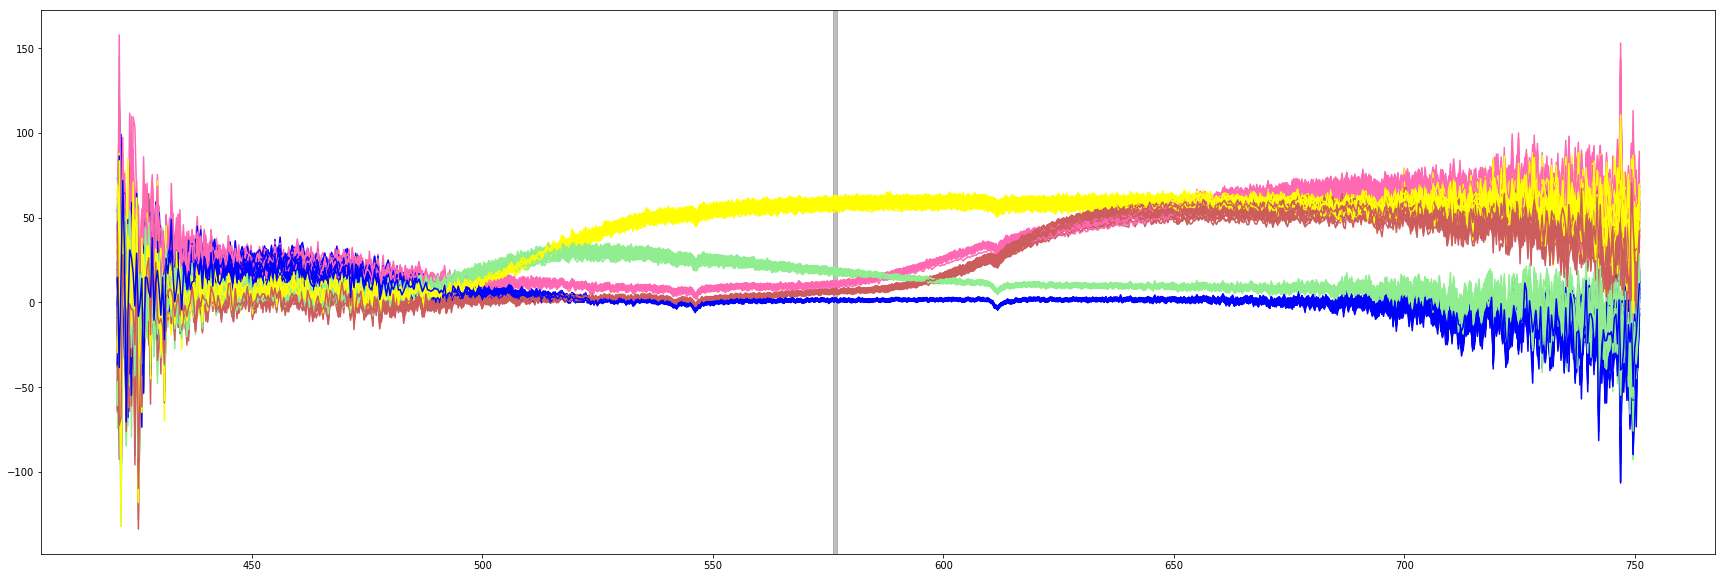

In [231]:
index = 0
for ind, row in x_train.iterrows():
    if y_train[index] == 0:
        plt.plot(b, row, color="blue")
    elif y_train[index] == 1:
        plt.plot(b, row, color="lightgreen")
    elif y_train[index] == 2:
        plt.plot(b, row, color="hotpink")
    elif y_train[index] == 3:
        plt.plot(b, row, color="indianred")
    elif y_train[index] == 4:
        plt.plot(b, row, color="yellow")    
    index += 1
    
plt.axvspan(576, 577, color='grey', alpha=0.5)

plt.show()

In [29]:
# http://scikit-learn.org/0.16/auto_examples/model_selection/plot_confusion_matrix.html

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [213]:
no_features = [1, 2, 3]

def experiment(no_features):
    results = []
    
    for i in no_features:
        logistic = RFE(logistic_regression, i, step=1)
        logistic = logistic.fit(x_train, y_train)
        
        print(get_true_indices(logistic.support_))
        
        y_res = logistic.predict(x_train)
        results.append(accuracy_score(y_train, y_res))
        
    return results

In [214]:
scores = experiment(no_features)
print(scores)

/usr/local/Cellar/python3/3.6.4_2/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[421]


/usr/local/Cellar/python3/3.6.4_2/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[421, 429]


/usr/local/Cellar/python3/3.6.4_2/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[250, 421, 429]
[0.8095238095238095, 0.8507936507936508, 0.9968253968253968]


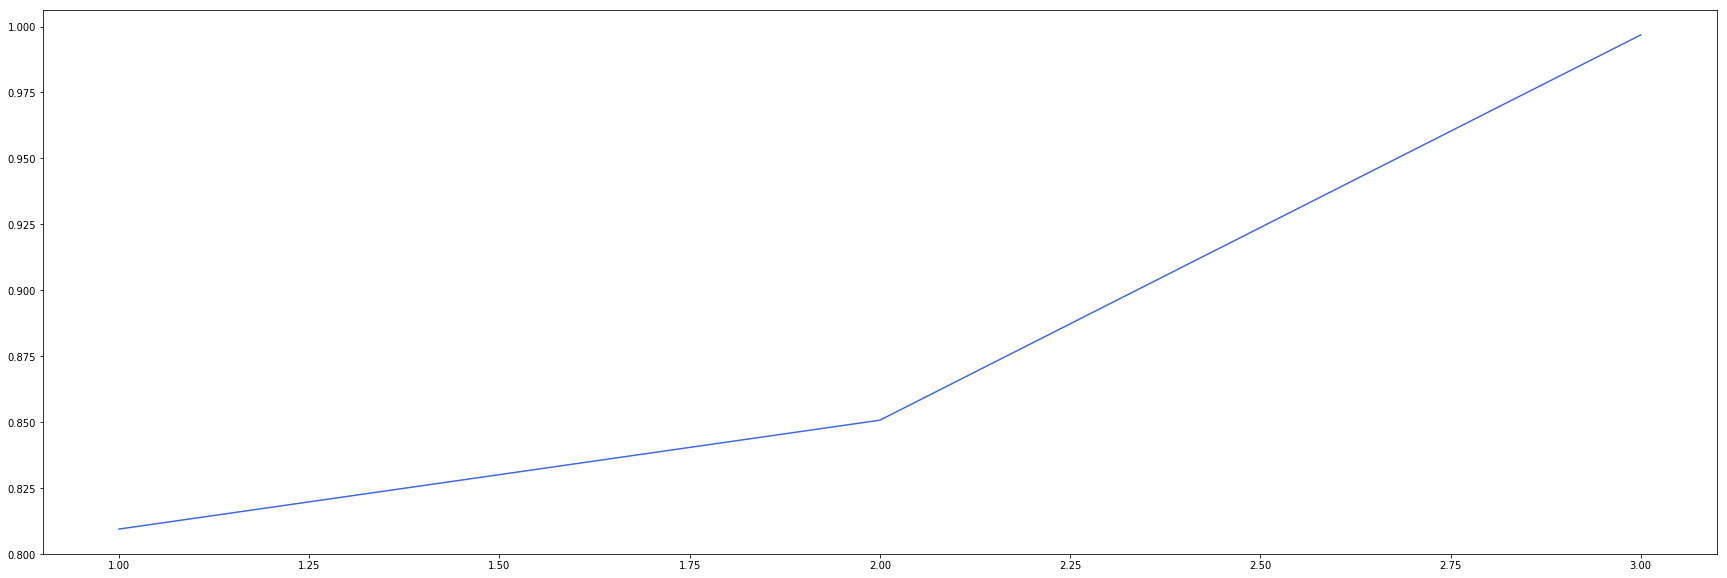

In [215]:
 plt.plot(no_features, scores, color="royalblue")

In [53]:
def get_true_indices(matrix):
    indices = []
    index = 0
    for i in matrix:
        if i == True:
            indices.append(index)
        index += 1
    return indices

In [97]:
indices = get_true_indices(selector.support_)

In [201]:
indices

[421, 429]

In [202]:
def get_features(df, indices):
    features = pd.DataFrame()

    for i in indices:
        a = df.iloc[:,i]
        features[i] = a.as_matrix(columns=None)
        
    return features

In [203]:
b = x_train.iloc[:,indices[0]]
features = get_features(x_train, indices)
print(features)


In [230]:
print(waves.iloc[[250]], waves.iloc[[421]], waves.iloc[[429]])

           0
250  513.929            0
421  576.238            0
429  579.124


In [ ]:
logistic_regression.fit(x_train, y_train.ravel())
y_res = logistic_regression.predict(x_train)
accuracy_score(y_train, y_res)